In [18]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy.integrate import quad
from scipy.optimize import curve_fit


    
    
    
    
def g_1d(E, T, a, P_N, P_Z):
    '''Definición de la derivada de la primera función de densidad con E'''
    
    U = E - P_N - P_Z
    
    return E*np.exp(-E/T) * (np.sqrt(np.pi)/12.) * ( (2. * np.sqrt(a * U))/( a**(0.25) * U**(1.25)) ) 


def g_1(E, T, a, P_Z, P_N):
    '''Definición de la primera función de densidad sin E'''
    
    U = E - P_N - P_Z
    
    return np.exp(-E/T) * (np.sqrt(np.pi)/12.) * ( (2. * np.sqrt(a * U))/( a**(0.25) * U**(1.25) ) ) 


#################################################################

def g_2d(E, T, sigma, E_0, tau):
    '''Definición de la derivada de la segunda función de densidad con E'''
    
    g = ( (np.sqrt(2. * np.pi) * sigma) / tau ) * (np.exp(E - E_0)/tau )
    
    return ( E*np.exp(-E/T) * g )
    
##################################################################    


def g_2(E, T, sigma, E_0, tau):
    '''Definición de la segunda función de densidad'''
    
    g = ( (np.sqrt(2. * np.pi) * sigma) / tau ) * (np.exp(E - E_0)/tau )
    
    return np.exp(-E/T) * g
    
##################################################################### 
    

def z_1(E, T):
    '''Primera parte de la función de partición'''
    
    suma = 0
    
    for e in E:
        suma += np.exp(-e/T)
        
    return suma
  
#####################################################################

def z_1d( E, T ):
    ''' Derivada de la primera parte de la función de partición'''
    
    suma = 0
    
    for e in E:
        suma += e * np.exp(-e/T)
        
    return suma


####################################################################

def binding(P, T, alfa, beta, gamma, eta, delta):
    '''Parametros de la funcion'''


    N , Z = P
    
    A = N + Z
    t = (0.5) * (Z - N)
    R = 1.07 * (1 + 0.01 * T)
    
    
    f = A%2 + Z%2 - np.ones(len(A)) 
    
    return alfa * A**(3/4) + beta * A**(2/3) + (gamma - (eta/A**(1/3)))*( (4*t**2 + 4*np.abs(t))/A ) + (Z**2)/(R * A**(1/3))*(1 - 0.7636/(Z**(2/3)) - 2.29/(R * A**(1/3))**2) + delta*(1/A**(3/4))
    

########################################################################

'''Vamos a realizar una prueba'''



T = np.linspace(1, 4, 10)
#print(type(t))

'''Creamos una lista con los elementos del eje y'''

Y = []

for t in T:
    t = np.round(t, 3)
   
    elements_pro = {'63Zn' : [8.69, 1.06, 0, 7.45, -0.44, 3.0, 33, 30, 1.10] , '64Zn' : [8.73, 1.06, 1.41, 8.03, 0.99, 3.0, 34, 30, 1.04],  '65Zn' : [8.72, 1.06, 0, 8.57, -1.11, 3.2, 35, 30, 1.07],
                    '66Zn' : [8.75, 1.06, 1.50, 8.99, 1.50, 2.9, 36, 30, 0.89],   '67Zn' : [8.73, 1.06, 0, 9.39, -0.73, 3.2, 37, 30, 0.95], '68Zn' : [8.75, 1.06, 1.50, 9.75, 1.19, 3.1 , 38, 30, 0.88],
                    '69Ga' : [8.72, 0, 1.50, 10.21, 0.08, 3.15, 38, 31, 0.855], '71Ga' : [8.72, 0, 1.43, 10.76, 0.05, 3.2, 40, 31, 0.815], '70Ge' : [8.72, 1.36, 1.50, 10.74, 0.89, 3.35, 38, 32, 0.855],
                    '72Ge' : [8.73, 1.36, 1.43, 11.30, 0.88, 3.40, 40, 32, 0.845], '74Ge' : [8,72, 1.36, 1.88, 12.48, 0.84, 3.65, 42, 32, 0.83],'75As' : [8.70, 0, 1.88, 11.95, -1.24, 3.75, 42, 33, 0.92],
                    '75Se' : [8.68, 1.43 , 0, 12.02, -0.76, 3.55, 41, 34, 0.835],'76Se' : [8.71, 1.43, 1.88 , 12.11, 0.60, 3.75, 42, 34, 0.875],'77Se' : [8.69, 1.43, 0, 11.80, -0.68, 3.6, 43, 34, 0.84],
                    '78Se' : [8.72, 1.43, 1.47, 11.88, 0.94, 3.55, 44, 34, 0.82], '80Se' : [8.71, 1.43, 1.57, 11.89, 0.57, 3.70, 46, 34, 0.865],'79Br' : [8.69, 0, 1.47, 12.48, -0.98, 3.75, 44, 35, 0.835],
                    '84Kr' : [8.72, 1.17, 1.46, 11.36, 1.20, 3.45, 48, 36, 0.79 ],'83Rb' : [8.67, 0, 1.57, 12.70, -0.04, 3.55, 46, 37, 0.745],'85Sr': [8.67, 1.24, 0, 12.19, -0.01, 3.4, 47, 38, 0.725],
                    '92Zr' : [8.50, 1.20, 0.72, 11.17, 1.01, 3.35, 52, 40, 0.74 ],'94Zr' : [8.67, 1.20, 1.12, 12.15, 0.84, 3.65, 54, 40, 0.76 ], '93Nb': [8.66, 0, 0.72, 10.88, -0.12, 3.3, 52, 41, 0.745],
                    '93Mo' : [8.65, 1.28, 0, 10.13, 0.43, 3.3, 51, 42, 0.79],  '95Mo' : [8.65, 1.28, 0, 11.36, -0.87, 3.8, 53, 42, 0.87 ], '96Mo': [8.65, 1.28, 1.12, 12.67, 1.01, 3.7, 54, 42, 0.725],
                    '97Mo' : [8.63, 1.28, 0, 12.93, -0.01, 3.6, 55, 42, 0.70 ], '99Mo' : [8.61, 1.28, 0, 14.17, -0.66, 3.95, 57,42, 0.72],'101Mo': [8.57, 1.28, 0, 15.48, -0.51, 4.0, 59, 42, 0.66],
                    '99Ru' : [8.61, 1.28, 0, 12.68, -0.27, 3.8, 55, 44, 0.745], '100Ru': [8.62, 1.28, 1.29, 13.30, 0.95, 3.8, 56, 44, 0.725], '101Ru': [8.60, 1.28, 0, 13.93, -0.83, 4.0, 57, 44, 0.745],
                    '102Ru': [8.61, 1.28, 0.94, 15.13, 0.80, 3.85, 58, 44, 0.64], '103Rh': [8.58, 0, 0.94, 14.70, -0.36, 3.75, 58, 45, 0.64],'104Rh': [8.57, 0, 0, 15.30, -1.11, 3.75, 59, 45, 0.60],
                    '105Rh': [8.57, 0, 1.24, 16.06, -0.24, 3.95, 60, 45, 0.615],'104Pd': [8.58, 1.35, 0.94, 14.55, 0.90, 3.85, 58, 46, 0.655 ],'105Pd': [8.57, 1.35, 0, 15.16, -0.90, 4.2, 59, 46, 0.72],
                    '106Pd': [8.58, 1.35, 1.24, 15.64, 0.78, 4.1, 60, 46, 0.66],  '108Pd': [8.57, 1.35, 1.25, 17.01, 0.47, 4.3, 62, 46, 0.66 ], '107Ag': [8.55, 0, 1.18, 15.71, 0.08, 3.8, 60, 47, 0.59],
                    '108Ag': [8.54,    0,    0, 15.14, -0.76,3.6, 61, 47, 0.56],  '109Ag': [8.55, 0, 1.25, 16.80, -0.41, 4.1, 62, 47, 0.61 ],'111Ag': [8.53, 0, 1.14, 17.51, -0.31, 4.05, 64, 47, 0.575],
                    '108Cd': [8.55, 1.36, 1.24, 15.47, 1.20, 3.95, 60, 48, 0.625], '109Cd': [8.54, 1.36, 0, 16.12, -0.80, 4.25, 61, 48, 0.675 ],'110Cd':[8.55, 1.36, 1.25, 16.56, 0.95, 4.1, 62, 48, 0.62],
                    '111Cd': [8.54, 1.36, 0, 16.94, -0.39, 4.15, 63, 48, 0.615],'112Cd': [8.54, 1.36, 1.14, 15.82, 0.77, 4.15, 64, 48, 0.65], '114Cd':[8.54, 1.36, 1.32, 17.43, 0.59, 4.35, 66, 48, 0.635],
                    '115In': [8.52, 0, 1.14, 17.44, 0.15, 4.0, 66, 49, 0.55],  '117In':[8.50, 0, 1.15, 17.38, 0.11, 3.9, 68, 49, 0.535], '116Sn': [8.52, 1.19, 1.32, 14.90, 0.92, 4.15, 66, 50, 0.665],
                    '117Sn': [8.51, 1.19, 0, 16.70, 0.23, 3.9, 67, 50, 0.545], '118Sn':[8.52, 1.19, 0.94, 16.22, 1.16, 4.0, 68, 50, 0.58],'119Sn': [8.50, 1.19, 0, 18.01, 0.14, 4.0, 69, 50, 0.525],
                    '120Sn': [8.50, 1.19, 1.24, 16.57, 1.31, 4.0, 70, 50, 0.565], '123Te':[8.47, 1.14, 0, 17.81, -0.43, 4.35, 71, 52, 0.58], '124Te': [8.47, 1.14, 1.43, 16.81, 0.85, 4.35, 72, 52, 0.62],
                    '125Te': [8.46, 1.14, 0, 16.24, -0.85, 4.4, 73, 52, 0.66], '127I': [8.45, 0, 1.09, 16.92, -0.42, 4.3, 74, 53, 0.60], '129I': [8.44, 0, 1.20, 15.87, -0.45, 4.3, 76, 53, 0.64]}
    
    #'116Sn' : 
    
    '''Las propiedades son:  [B_0, P(Z), P(N), a, E_0, simga, N, Z, tau]'''
    
    '''                      [0  , 1 ,   2   , 3, 4 ,  5,     6, 7, 8  ]'''
        
    y = []    
        
    for el in elements_pro:
        
            '''Leemos los csv de cada elemento'''
            
            element_file = pd.read_csv(el+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)
            
           
            '''Pasamos todo a float'''
            element_file['energy'] = pd.to_numeric(element_file['energy'], errors='coerce')
            
            
            '''Eliminamos los nan'''
            element_file.dropna(subset = ['energy'], inplace=True)   
        
        
            '''Tomamos las condición si se cumple o no'''
            
            U_x = 2.5 + (150./( elements_pro[el][6] + elements_pro[el][7] ))
            
            E_x = (U_x + elements_pro[el][1] + elements_pro[el][2])
            
            
            '''Integramos dependiendo de la función de densidad'''
            
            print(element_file['energy'].iloc[-1]/1000)
            
            
            
            if (element_file['energy'].iloc[-1]/1000) > E_x:
                
                print('Se cumple')
                intr_0 = quad(g_1, element_file['energy'].iloc[-1]/1000, 25, 
                              args=(t, elements_pro[el][3], elements_pro[el][1], elements_pro[el][2]))[0] 
                
                #print(intr_0)
                
                intr_1 = quad(g_1d, element_file['energy'].iloc[-1]/1000, 25, 
                              args=(t, elements_pro[el][3], elements_pro[el][1], elements_pro[el][2]))[0] 
                
                print(intr_1)
                print(intr_0)
            
            else:
                    
                print('No se cumple')
                intr_0 = quad(g_2, element_file['energy'].iloc[-1]/1000, 25, 
                              args=(t, elements_pro[el][5], elements_pro[el][4], elements_pro[el][8]))[0] 
        
                intr_1 = quad(g_2d, element_file['energy'].iloc[-1]/1000, 25, 
                              args=(t, elements_pro[el][5], elements_pro[el][4], elements_pro[el][8]))[0] 
        
                print(intr_1)
                print(intr_0)
            
            '''
            intr_0 = 2.3
            intr_1 = 2.4
            '''
            
            E_y = ( z_1d(element_file['energy'][2:]/1000, t ) + intr_1 )/( 1. + z_1(element_file['energy'][2:]/1000, t) + intr_0 )
            
            #print(E_y)
            #E_y = -(elements_pro[el][0])*(elements_pro[el][6] + elements_pro[el][7] ) + (1 / ( z_1( (element_file['energy'][2:]/1000), t) + intr_0) ) *  ( z_1d( (element_file['energy'][2:]/1000), t) + intr_1 )
            
            y.append( E_y  - elements_pro[el][0] )
            
            
       
    Y.append(y)
    
    

Y = np.asarray(Y)
print(Y)

'''Hemos obtenido una lista con los valores de Y'''


9.774
Se cumple
5.437526354035336e-05
5.07848287367468e-06
24.869400000000002
Se cumple
2.3282319369913925e-12
9.337866714372988e-14
11.029
Se cumple
1.6362117617270504e-05
1.3670571707310992e-06
12.714
Se cumple
3.4591133147910206e-06
2.5332712157111127e-07
11.47
Se cumple
1.0840145600519354e-05
8.733639234204755e-07
18.016
Se cumple
1.8192233309831417e-08
9.590289040578468e-10
12.434
Se cumple
4.397851120176259e-06
3.287319714673214e-07
13.773
Se cumple
1.1811577824901028e-06
8.022800918650841e-08
13.173
Se cumple
2.3369612053107023e-06
1.6557214505933277e-07
8.867899999999999
Se cumple
0.00017379648954162725
1.7771550457123523e-05
9.45791
No se cumple
2.0933530794526424e-06
1.2150203418911029e-07
13.282
Se cumple
2.0236581413999616e-06
1.422297164267521e-07
10.243
Se cumple
3.971401453971299e-05
3.553321629939861e-06
14.198
Se cumple
8.927370257547999e-07
5.895796706354356e-08
7.43196
Se cumple
0.0006352789472857599
7.614778988725421e-05
6.161
No se cumple
1517.37528596267
97.389383

'Hemos obtenido una lista con los valores de Y'

In [2]:

A = []

for n in elements_pro.keys():
    a = elements_pro[n][6] #N
    b = elements_pro[n][7] #Z
    
    A.append([a, b])

A = np.asarray(A)

print(A)

A = np.transpose(A)


#params = np.asarray(params)
#type(params)

[[33.   30.  ]
 [34.   30.  ]
 [35.   30.  ]
 [36.   30.  ]
 [37.   30.  ]
 [38.   30.  ]
 [38.   31.  ]
 [40.   31.  ]
 [38.   32.  ]
 [40.   32.  ]
 [ 3.65 42.  ]
 [42.   33.  ]
 [41.   34.  ]
 [42.   34.  ]
 [43.   34.  ]
 [44.   34.  ]
 [46.   34.  ]
 [44.   35.  ]
 [48.   36.  ]
 [46.   37.  ]
 [47.   38.  ]
 [52.   40.  ]
 [54.   40.  ]
 [52.   41.  ]
 [51.   42.  ]
 [53.   42.  ]
 [54.   42.  ]
 [55.   42.  ]
 [57.   42.  ]
 [59.   42.  ]
 [55.   44.  ]
 [56.   44.  ]
 [57.   44.  ]
 [58.   44.  ]
 [58.   45.  ]
 [59.   45.  ]
 [60.   45.  ]
 [58.   46.  ]
 [59.   46.  ]
 [60.   46.  ]
 [62.   46.  ]
 [60.   47.  ]
 [61.   47.  ]
 [62.   47.  ]
 [64.   47.  ]
 [60.   48.  ]
 [61.   48.  ]
 [62.   48.  ]
 [63.   48.  ]
 [64.   48.  ]
 [66.   48.  ]
 [66.   49.  ]
 [68.   49.  ]
 [66.   50.  ]
 [67.   50.  ]
 [68.   50.  ]
 [69.   50.  ]
 [70.   50.  ]
 [71.   52.  ]
 [72.   52.  ]
 [73.   52.  ]
 [74.   53.  ]
 [76.   53.  ]]


In [3]:

T = np.linspace(1, 4, 10)


alfas = np.zeros(len(T))
betas = np.zeros(len(T))
gammas = np.zeros(len(T))
etas = np.zeros(len(T))
deltas = np.zeros(len(T))


#for t in range(len(T)):


for t in range(len(T)):
     
    popt , pcov = curve_fit(lambda P, alfa, beta, gamma, eta, delta: binding(P, T[t], alfa, beta, gamma, eta, delta), A, Y[t],
                            p0 = (-16.11, 20.21, 20.65, 48.00, 33.00))    
        

    alfas[t] = popt[0]
    betas[t] = popt[1]
    gammas[t] = popt[2]
    etas[t] = popt[3]
    deltas[t] = popt[4]





'''
for t in range(len(T)):
     
    popt , pcov = curve_fit(lambda P, alfa, beta, gamma, eta, delta: binding(P, T[t] ,alfa, beta, gamma, eta, delta), A, Y[t],
                            p0 = (-16.11, 20.21, 20.65, 48.00, 33.00))

    alfas[t] = popt[0]
    betas[t] = popt[1]
    gammas[t] = popt[2]
    etas[t] = popt[3]

'''



'\nfor t in range(len(T)):\n     \n    popt , pcov = curve_fit(lambda P, alfa, beta, gamma, eta, delta: binding(P, T[t] ,alfa, beta, gamma, eta, delta), A, Y[t],\n                            p0 = (-16.11, 20.21, 20.65, 48.00, 33.00))\n\n    alfas[t] = popt[0]\n    betas[t] = popt[1]\n    gammas[t] = popt[2]\n    etas[t] = popt[3]\n\n'

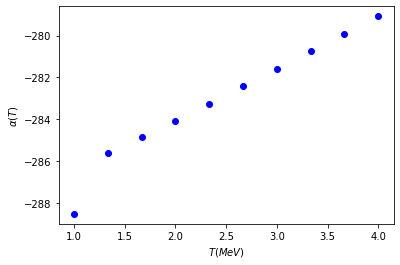

In [4]:


plt.plot(T, alfas, 'bo', )
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\alpha(T)$')
plt.savefig('alfa.pdf')


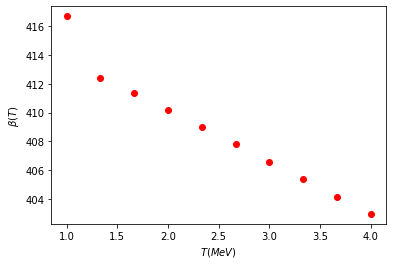

In [5]:
plt.plot(T, betas, 'ro')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\beta(T)$')
plt.savefig('beta.pdf')

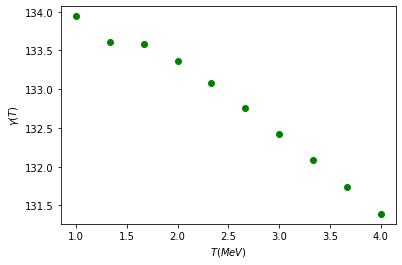

In [6]:
plt.plot(T, gammas, 'go')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\gamma(T)$')
plt.savefig('gamma.pdf')

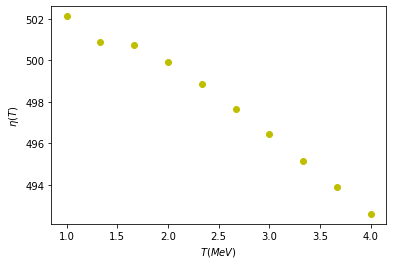

In [7]:
plt.plot(T, etas, 'yo')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\eta(T)$')
plt.savefig('eta.pdf')

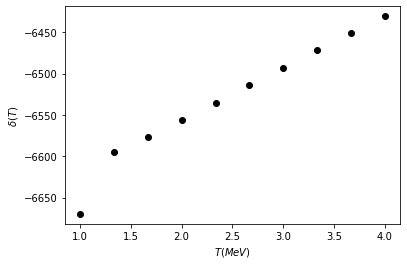

In [8]:
plt.plot(T, deltas, 'ko')
plt.xlabel(r'$T(MeV)$')
plt.ylabel(r'$\delta(T)$')
plt.savefig('delta.pdf')

pandas.core.series.Series

In [33]:
element_file['jp'][2:] = element_file['jp'][2:].str.replace('+', '')
element_file['jp'][2:] = element_file['jp'][2:].str.replace('-', '')
element_file['jp'][2:] = element_file['jp'][2:].str.replace('(', '')
element_file['jp'][2:] = element_file['jp'][2:].str.replace(')', '')

In [34]:
element_file['jp'][2:]

2         5/2
3         1/2
4         1/2
5         3/2
6         5/2
       ...   
69    5/2 7/2
70       25/2
71       27/2
72       29/2
73       31/2
Name: jp, Length: 72, dtype: object

In [35]:
element_file.dropna(subset = ['jp'], inplace=True)

In [36]:
element_file

,Z,N,symbol,energy,unc,jp,half-life operator,half_life,unc.1,unit,...,decay %.1,unc.4,decay.2,decay %.2,unc.5,isospin,magn. dipole,unc.6,elect.quadrupole,unc.7
0,Z,N,symbol,energy,unc,jp,half-life operator,half_life,unc,unit,...,decay %,unc,decay,decay %,unc,isospin,magn. dipole,unc,elect. quadrupole,unc
1,30,33,Zn,0,,3/2-,,38.47,5,m,...,,,,,,,-0.28164,,0.29,
2,30,33,Zn,192.92,0.04,5/2,,0.53,12,ns,...,,,,,,,,,,
3,30,33,Zn,247.84,0.05,1/2,,33,8,ps,...,,,,,,,,,,
4,30,33,Zn,627.11,0.06,1/2,,,,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,30,33,Zn,7200,,5/2 7/2,,,,,...,,,,,,,,,,
70,30,33,Zn,7610.8,1.2,25/2,,,,,...,,,,,,,,,,
71,30,33,Zn,7927,1.3,27/2,,,,,...,,,,,,,,,,
72,30,33,Zn,9096.8,1.6,29/2,,,,,...,,,,,,,,,,


In [132]:
#element_file['jp'][2:] = element_file['jp'][2:].astype('float64')

In [134]:

import fractions


#element_file['jp'][70] = float(fractions.Fraction(element_file['jp'][70]))

In [105]:
#element_file['jp'][70]

12.5

In [108]:
#element_file['jp'][69]

'5/2 7/2'

In [109]:
#len(element_file['jp'][69])

7

In [112]:
#element_file['jp'][69] = element_file['jp'][69][4:]

In [114]:
#element_file['jp'][69] = float(fractions.Fraction(element_file['jp'][69]))

In [115]:
#element_file['jp'][69]

3.5

In [136]:

import fractions
import numpy as np
import pandas as pd
from scipy.integrate import quad

In [151]:



element_file = pd.read_csv('63Zn'+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)



element_file.dropna(subset = ['jp'], inplace=True)                    #Hay que considerar este estado base?


element_file['jp'][1:] = element_file['jp'][1:].str.replace('+', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('-', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('(', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace(')', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('', 'a')


for i in range(1, len(element_file['jp'][1:])):
    

    if type(element_file['jp'][1:][i]) == int or type(element_file['jp'][1:][i]) == float:
        continue
    
    if len(element_file["jp"][1:][i]) >= 4:
 
        
        #element_file["jp"][1:][i].remove('')
        element_file["jp"][1:][i] = element_file["jp"][1:][i][4:]
        element_file["jp"][1:][i] = float(fractions.Fraction(element_file['jp'][1:][i]))
        print(f'{i} {element_file["jp"][1:][i]}')
        #print(f'{len(element_file["jp"][2:][i])} {element_file["jp"][2:][i]}')
        
element_file["jp"][1:]

13 1.5
18 3.5
20 1.5


ValueError: Invalid literal for Fraction: ''

In [206]:
element_file = pd.read_csv('63Zn'+'.csv', names=['Z', 'N', 'symbol', 'energy', 'unc', 'jp', 'half-life operator',
            'half_life', 'unc.1', 'unit', 'half_life[s]', 'unc.2', 'decay',
            'decay %', 'unc.3', 'decay.1', 'decay %.1', 'unc.4', 'decay.2',
            'decay %.2', 'unc.5', 'isospin', 'magn. dipole', 'unc.6',
            'elect.quadrupole ', 'unc.7'], comment=',', header=None)


element_file.dropna(subset = ['jp'], inplace=True)                    #Hay que considerar este estado base?


element_file['jp'][1:] = element_file['jp'][1:].str.replace('+', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('-', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace('(', '')
element_file['jp'][1:] = element_file['jp'][1:].str.replace(')', '')
#element_file['jp'][1:] = element_file['jp'][1:].str.replace('', 'a')


In [207]:


for i in range(1, len(element_file['jp'][1:])):
    
    element_file['jp'][1:][i] = list(element_file['jp'][1:][i])
    
    
    if len(element_file['jp'][1:][i]) == 0 or element_file['jp'][1:][i] == [' ']:
        
        element_file['jp'][1:][i] = 0
        print(type(element_file['jp'][1:][i]))
        print(f'{i} {element_file["jp"][1:][i]}')
        continue
    
    if ' ' in element_file['jp'][1:][i]:
        element_file['jp'][1:][i].remove(' ')
        
        while len(element_file['jp'][1:][i]) != 3:
            
            
        
    print(element_file['jp'][1:][i])

['3', '/', '2']
['5', '/', '2']
['1', '/', '2']
['1', '/', '2']
['3', '/', '2']
['5', '/', '2']
['3', '/', '2']
['7', '/', '2']
['1', '/', '2']
['7', '/', '2']
['5', '/', '2']
['3', '/', '2']
['1', '/', '2', '3', '/', '2']
['9', '/', '2']
['7', '/', '2']
['5', '/', '2']
['9', '/', '2']
['5', '/', '2', '7', '/', '2']
['9', '/', '2']
['1', '/', '2', '3', '/', '2']
<class 'int'>
21 0
['9', '/', '2']
['3', '/', '2']
['1', '1', '/', '2']
<class 'int'>
25 0
['3', '/', '2']
['7', '/', '2']
['3', '/', '2']
['3', '/', '2']
['1', '1', '/', '2']
['9', '/', '2']
<class 'int'>
32 0
['3', '/', '2']
['1', '3', '/', '2']
['1', '/', '2', '3', '/', '2', ' ', '5', '/', '2']
<class 'int'>
36 0
['5', '/', '2', '7', '/', '2']
<class 'int'>
38 0
['5', '/', '2', '7', '/', '2']
['1', '1', '/', '2']
['5', '/', '2', '7', '/', '2']
['9', '/', '2']
['1', '3', '/', '2']
['5', '/', '2', '7', '/', '2']
['5', '/', '2', '7', '/', '2']
['5', '/', '2', '7', '/', '2']
['1', '3', '/', '2']
['1', '3', '/', '2']
['1', '7', '

In [229]:

ej = ['3', '/', '2']

ej = ''.join([str(elem) for elem in ej])
ej = float(fractions.Fraction(ej))

print(type(ej))
print(ej)

<class 'float'>
1.5


In [222]:

ej = str(ej)
print(type(ej))
print(ej)
ej = float(fractions.Fraction(ej))

<class 'str'>
['3', '/', '2']


ValueError: Invalid literal for Fraction: "['3', '/', '2']"

In [ ]:

strings = [str(integer) for integer in integers]
a_string = "".join(strings)
an_integer = int(a_string)

In [225]:
a = '3/2'
print(type(a))
print(a)
a = float(fractions.Fraction(a))
print(type(a))
print(a)

<class 'str'>
3/2
<class 'float'>
1.5


In [232]:
ej = ['3', '/', '2', '5', '/', '2']

for i in range(len(ej)):
    
    while len(ej) != 3:
        
        ej.pop(0)
        
print(ej)

['5', '/', '2']
